In [2]:
import pandas as pd
"""Load in the heart disease dataset from the UCI repository."""
data = pd.read_csv("D:/VSCode ProjectsRepos/BINF-5007-Materials/Assignment 2/Data/heart_disease_uci(1).csv")
heart_disease = data.copy()


In [ ]:
"""Explore the dataset."""
# Display the first few rows of the dataset
print(heart_disease.head())
# Display the shape of the dataset
print("Shape of the dataset:", heart_disease.shape)
# Display the columns of the dataset
print("Columns in the dataset:", heart_disease.columns.tolist())
# Display the data types of each column
print("Data types of each column:\n", heart_disease.dtypes)


In [2]:
"""Linear Regression Model to predic cholesterol levels.
1.Use R² and RMSE as evaluation metrics.
2. For linear regression:
     ■ Implement ElasticNet. Experiment with varying regularization
       parameters (alpha and l1_ratio) and observe their effects on model
       coefficients and performance.
3. Create a heatmap (see documentation for seaborn.heatmap) of R2 and RMSE
   across a range of alpha and l1_ratio. Use clear labels and a color bar to guide interpretation.
4. Identify the top-performing configuration based on the evaluation metrics.

"""
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt






_____________________Imputing Missing Values_____________________________
_____________________Removing Redunant Features_____________________________
               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.243883  0.100819  0.363978  0.249074  0.186387  0.330057
trestbps  0.243883  1.000000  0.078684  0.097426  0.149625  0.025111  0.099388
chol      0.100819  0.078684  1.000000  0.227757  0.018049  0.055724  0.260763
thalch    0.363978  0.097426  0.227757  1.000000  0.163270  0.175443  0.362250
oldpeak   0.249074  0.149625  0.018049  0.163270  1.000000  0.130664  0.421718
ca        0.186387  0.025111  0.055724  0.175443  0.130664  1.000000  0.286047
num       0.330057  0.099388  0.260763  0.362250  0.421718  0.286047  1.000000
Redundant Columns to Drop : set()
_____________________Encoding and Normalizing the Data_____________________________
Mean Squared Error: 6441.429782244686
R-squared: 0.4744156160408187


d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 2\Scripts\data_preprocessor2.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  messy_data_impute[col].fillna(messy_data_impute[col].mean(), inplace=True)   #replace any missing in the column with mean of the col
d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 2\Scripts\data_preprocessor2.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

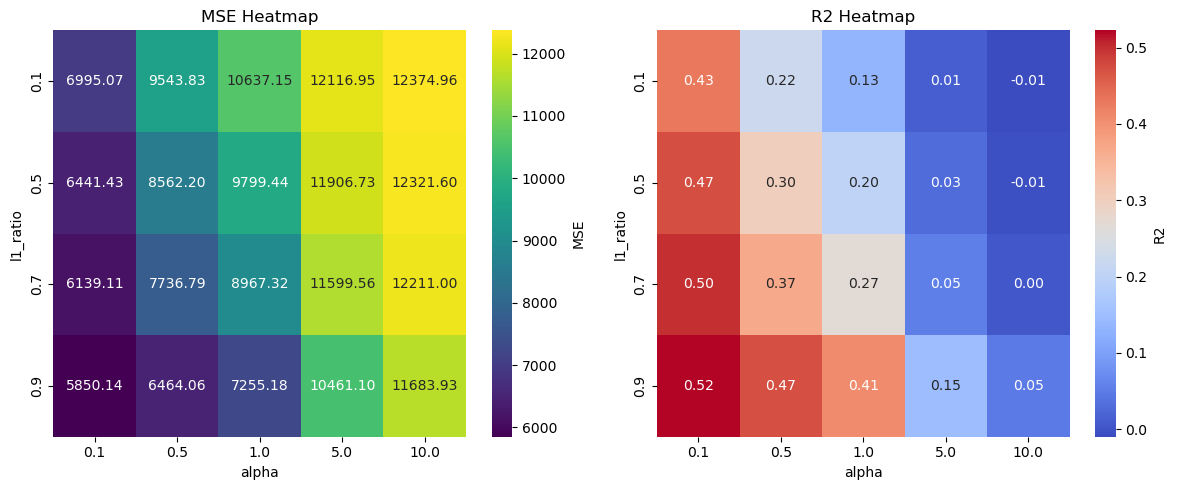

Best alpha: 0.1, Best l1_ratio: 0.9
Mean Squared Error with CV: 5850.136865353955
R-squared with CV: 0.5226617871502311


In [5]:
"""Data Preprocessing"""
import regression_models as reg_model
import data_preprocessor2 as dp


clean_heart_data = reg_model.clean_data(heart_disease)
clean_heart_data = dp.impute_missing_values(clean_heart_data,strategy='mean',target_col='chol')
clean_heart_data = dp.remove_outliers(clean_heart_data, target_col='chol')
clean_heart_data = dp.remove_redundant_features(clean_heart_data)
clean_heart_data = dp.normalize_data(clean_heart_data, target_col='chol')
reg_model.elastic_net_regression(clean_heart_data)
clean_heart_data.to_csv('D:/VSCode ProjectsRepos/BINF-5007-Materials/Assignment 2/Data/Linear_reg_heart_disease.csv', index=False)







In [ ]:
# """Logistic Regression Model to predict the presence of heart disease.
# 1. Use accuracy, precision, recall, and F1-score as evaluation metrics.
#Cleaning for logistic regression

logistic_heart_data = reg_model.clean_data(heart_disease)       
logistic_heart_data = dp.impute_missing_values(logistic_heart_data, strategy='mean', target_col='num')
logistic_heart_data = dp.remove_outliers(logistic_heart_data, target_col='num')
logistic_heart_data = dp.remove_redundant_features(logistic_heart_data) 
logistic_heart_data = dp.normalize_data(logistic_heart_data, target_col='num')

